# matplotlib exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Q1: planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [2]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])

These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years

In [3]:
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

Finally, the names of the planets corresponding to these are:

In [4]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

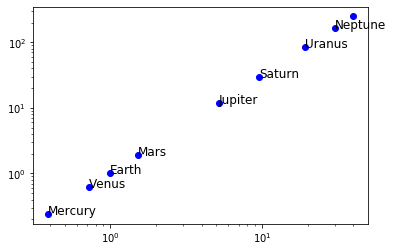

In [7]:
fig=plt.figure()
plt.loglog(a,P,'bo')
for i in range(8):
    plt.text(a[i],P[i],names[i],fontsize=12)

## Q2: drawing a circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:
$$
x = R\cos(\theta)
$$
$$ 
y = R\sin(\theta)
$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

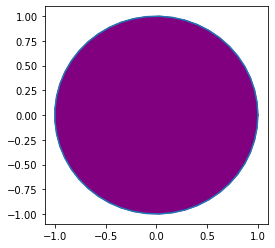

In [8]:
fig=plt.figure(figsize=(4,4))
theta=np.linspace(0,2*np.pi)
x=np.cos(theta)
y=np.sin(theta)
plt.plot(x,y)
plt.fill(x,y,color='purple')

## Q3: Circles, circles, circles...

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

([<matplotlib.lines.Line2D object at 0x000002320A1B1788>], [<matplotlib.patches.Polygon object at 0x000002320A40DE88>])
([<matplotlib.lines.Line2D object at 0x000002320A40DF48>], [<matplotlib.patches.Polygon object at 0x000002320A40D9C8>])
([<matplotlib.lines.Line2D object at 0x000002320A530F88>], [<matplotlib.patches.Polygon object at 0x000002320A4204C8>])
([<matplotlib.lines.Line2D object at 0x000002320A67A4C8>], [<matplotlib.patches.Polygon object at 0x0000023209E3E348>])
([<matplotlib.lines.Line2D object at 0x000002320A602948>], [<matplotlib.patches.Polygon object at 0x000002320A4A4748>])
([<matplotlib.lines.Line2D object at 0x0000023209F4E188>], [<matplotlib.patches.Polygon object at 0x000002320A5F91C8>])
([<matplotlib.lines.Line2D object at 0x000002320A548248>], [<matplotlib.patches.Polygon object at 0x000002320A500648>])
([<matplotlib.lines.Line2D object at 0x000002320A4F58C8>], [<matplotlib.patches.Polygon object at 0x000002320A65D388>])
([<matplotlib.lines.Line2D object at 0x0

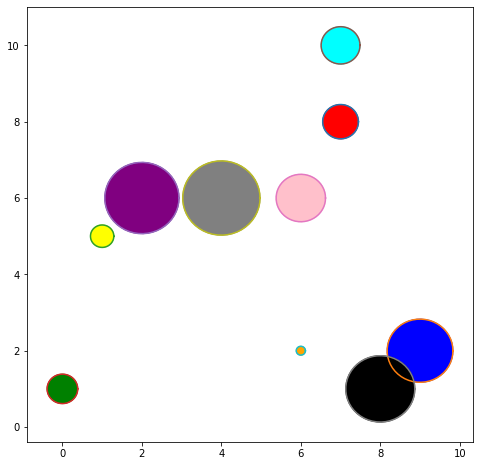

In [13]:
def draw_circle(x0,y0,R,color):
    theta=np.linspace(0,2*np.pi)
    x=R*np.cos(theta)+x0
    y=R*np.sin(theta)+y0
    return plt.plot(x,y),plt.fill(x,y,color=color)
colors=['red','blue','yellow','green','purple','cyan','pink','black','gray','orange']
x0=np.random.randint(0,11,10)
y0=np.random.randint(0,11,10)
R0=np.random.rand(10)
fig=plt.figure(figsize=(8,8))
for i in range(10):
    print(draw_circle(x0[i],y0[i],R0[i],colors[i]))

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt

(this data comes from: https://data.giss.nasa.gov/gistemp/graphs/)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the NumPy `where()` function useful.

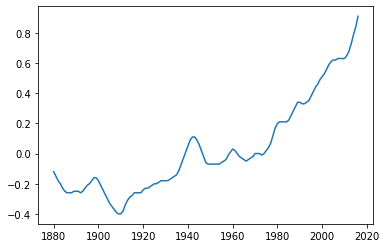

In [6]:
data=np.loadtxt('nasa-giss.txt',skiprows=1,comments='#') # 跳过以#开头的行
fig=plt.figure()
year=data[:,0]
change=data[:,1]
smoothed_change=data[:,2]
plt.plot(year,smoothed_change)

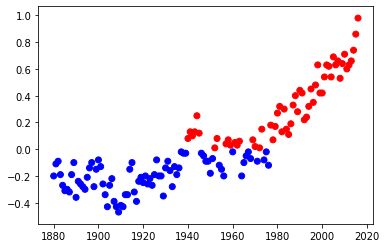

In [7]:
c=np.where(change<0,'b','r')
plt.scatter(year,change,color=c)

## Q5: subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplot()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


In [ ]:
x=np.linspace(0,2*np.pi,100)
f=x**3
fig=plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(x,f)

plt.subplot(312)
plt.subplot(313)

## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

### 6.1 Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [2]:
f=open("shore_leave.txt", "r")
context=f.read().lower()
context=context.replace(',','') # 将标点符号替换为空格
context=context.replace('.','')
context=context.split() # 将单词以空格分割
dict={}
for word in context:
    if word in dict:
        dict[word]+=1
    else:
        dict[word]=1
print(dict)
### 可以根据停词列表删除停词，保留实词
### 拓展：制作词云图

{'shore': 12, 'leave': 11, 'bridge': 12, 'enterprise': 2, 'is': 105, 'orbiting': 2, 'a': 133, 'very': 12, 'green': 5, 'planet': 19, 'and': 96, 'young': 6, 'female': 1, 'yeoman': 10, 'getting': 3, 'signature': 1, 'from': 18, 'the': 162, 'captain': 53, 'anything': 6, 'landing': 2, 'party': 4, 'they': 28, 'should': 6, 'be': 32, 'sending': 1, 'up': 21, 'report': 7, 'momentarily': 1, 'kirk': 33, 'stretches': 1, 'groans': 1, 'something': 6, 'wrong': 3, 'kink': 1, 'in': 40, 'my': 27, 'back': 17, 'behind': 4, 'his': 18, 'starts': 1, 'to': 102, 'massage': 1, 'it': 82, 'that': 47, 'little': 8, 'higher': 1, 'please': 1, 'push': 2, 'hard': 2, 'dig': 1, 'there': 27, 'mister': 33, 'spock': 23, 'steps': 1, 'forward': 1, 'realises': 1, 'who': 7, 'massaging': 1, 'lower': 1, 'thank': 5, 'you': 132, 'sufficient': 2, 'need': 4, 'sleep': 4, 'if': 7, 'not': 57, 'out': 18, 'of': 69, 'line': 3, 'i': 128, 'have': 50, 'enough': 1, 'doctor': 24, 'mccoy': 26, 'correct': 1, 'after': 10, 'what': 37, 'this': 46, 'sh

In [7]:
# 过滤停词
import nltk, urllib.request

f=open("shore_leave.txt", "r")
tokens=f.read().lower()
tokens=tokens.replace(',','')
tokens=tokens.replace('.','')
tokens=tokens.split()

# Freq_dist_nltk=nltk.FreqDist(token)
# print(Freq_dist_nltk.plot(50, cumulative=False))
# for k,v in Freq_dist_nltk.items():
    # print(str(k)+':'+str(v)) ### 未过滤的词频统计

stopwords = [word.strip().lower() for word in open("stop.txt")]
clean_tokens = [tok for tok in tokens if len(tok.lower()) > 1 and (tok.lower() not in stopwords)]
Freq_dist_nltk=nltk.FreqDist(clean_tokens)

### 2. Plot 25 most frequent words

Plot a labelled bar chart of the most frequent 25 words with their frequencies.

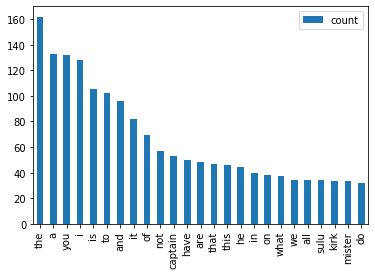

In [5]:
import pandas as pd
words_count=pd.DataFrame(pd.Series(dict),columns=['count'])
sorted=words_count.sort_values(by='count',ascending=False)
sorted.iloc[:25,:].plot(kind='bar')

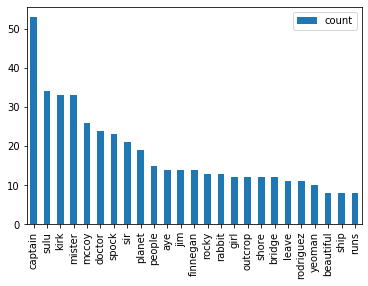

In [9]:
# 过滤停词的25 most frequent words
import pandas as pd
words_count=pd.DataFrame(pd.Series(Freq_dist_nltk),columns=['count'])
sorted=words_count.sort_values(by='count',ascending=False)
sorted.iloc[:25,:].plot(kind='bar')

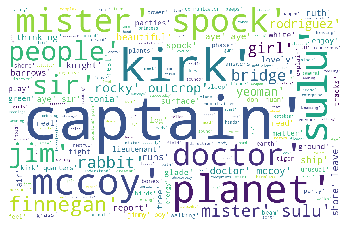

In [10]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1500,height=960,margin=10).generate(str(clean_tokens))
# 设置背景为白色，默认为黑色；设置图片的宽度、高度、边缘
plt.imshow(wordcloud)
plt.axis("off")
plt.show()